In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopy.distance
from math import radians,cos,sin,asin,sqrt
import folium
import datetime
from folium.plugins import HeatMap
from scipy.stats import ttest_ind

matplotlib.rcParams.update({'font.size': 12})

Reading the uber dataset

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Uber Drives - .csv')

First 10 records of the dataset

In [ ]:
data.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


Last 10 records of the dataset

In [ ]:
data.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


##Check for Mising Values

If a data is not available, Python uses **NaN** to represnet it.

Let's check below if there data points missing in our dataset.

In [ ]:
data.isnull().any() 

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [ ]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

 Now, we will drop all the NaN values in our dataset.

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Now we can see that there are not missing values in the dataset.

In [ ]:
data.shape

(653, 7)

In [ ]:
data.size

4571

Information about all the variables of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [ ]:
data.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


What all categories we have?

In [ ]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

Countplot visualization.

<Axes: xlabel='CATEGORY*', ylabel='count'>

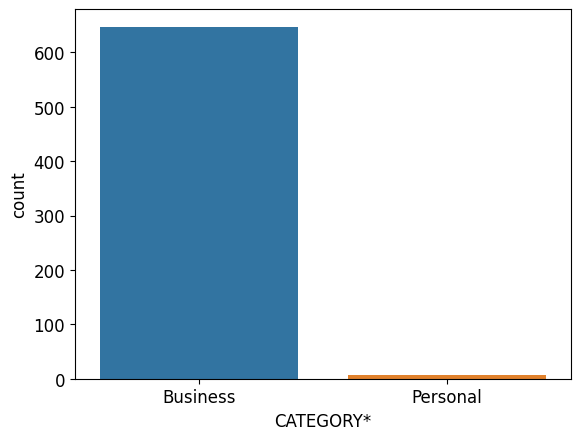

In [ ]:
sns.countplot(x='CATEGORY*',data=data)

We have large number of business rides caegory as against very few personal rides.

<Axes: ylabel='Frequency'>

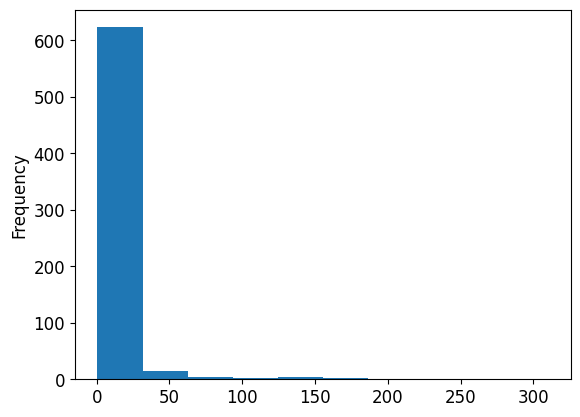

In [ ]:
data['MILES*'].plot.hist()

Mostly people travel in a short mile with Uber.

<Axes: >

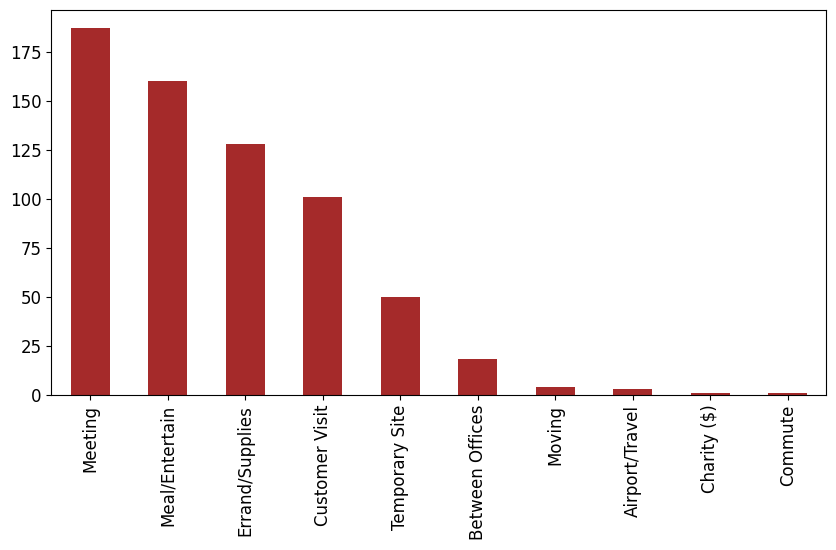

In [ ]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

We can notice that mostly the purpose of the trip is meeting and meal/entertain.

<Axes: >

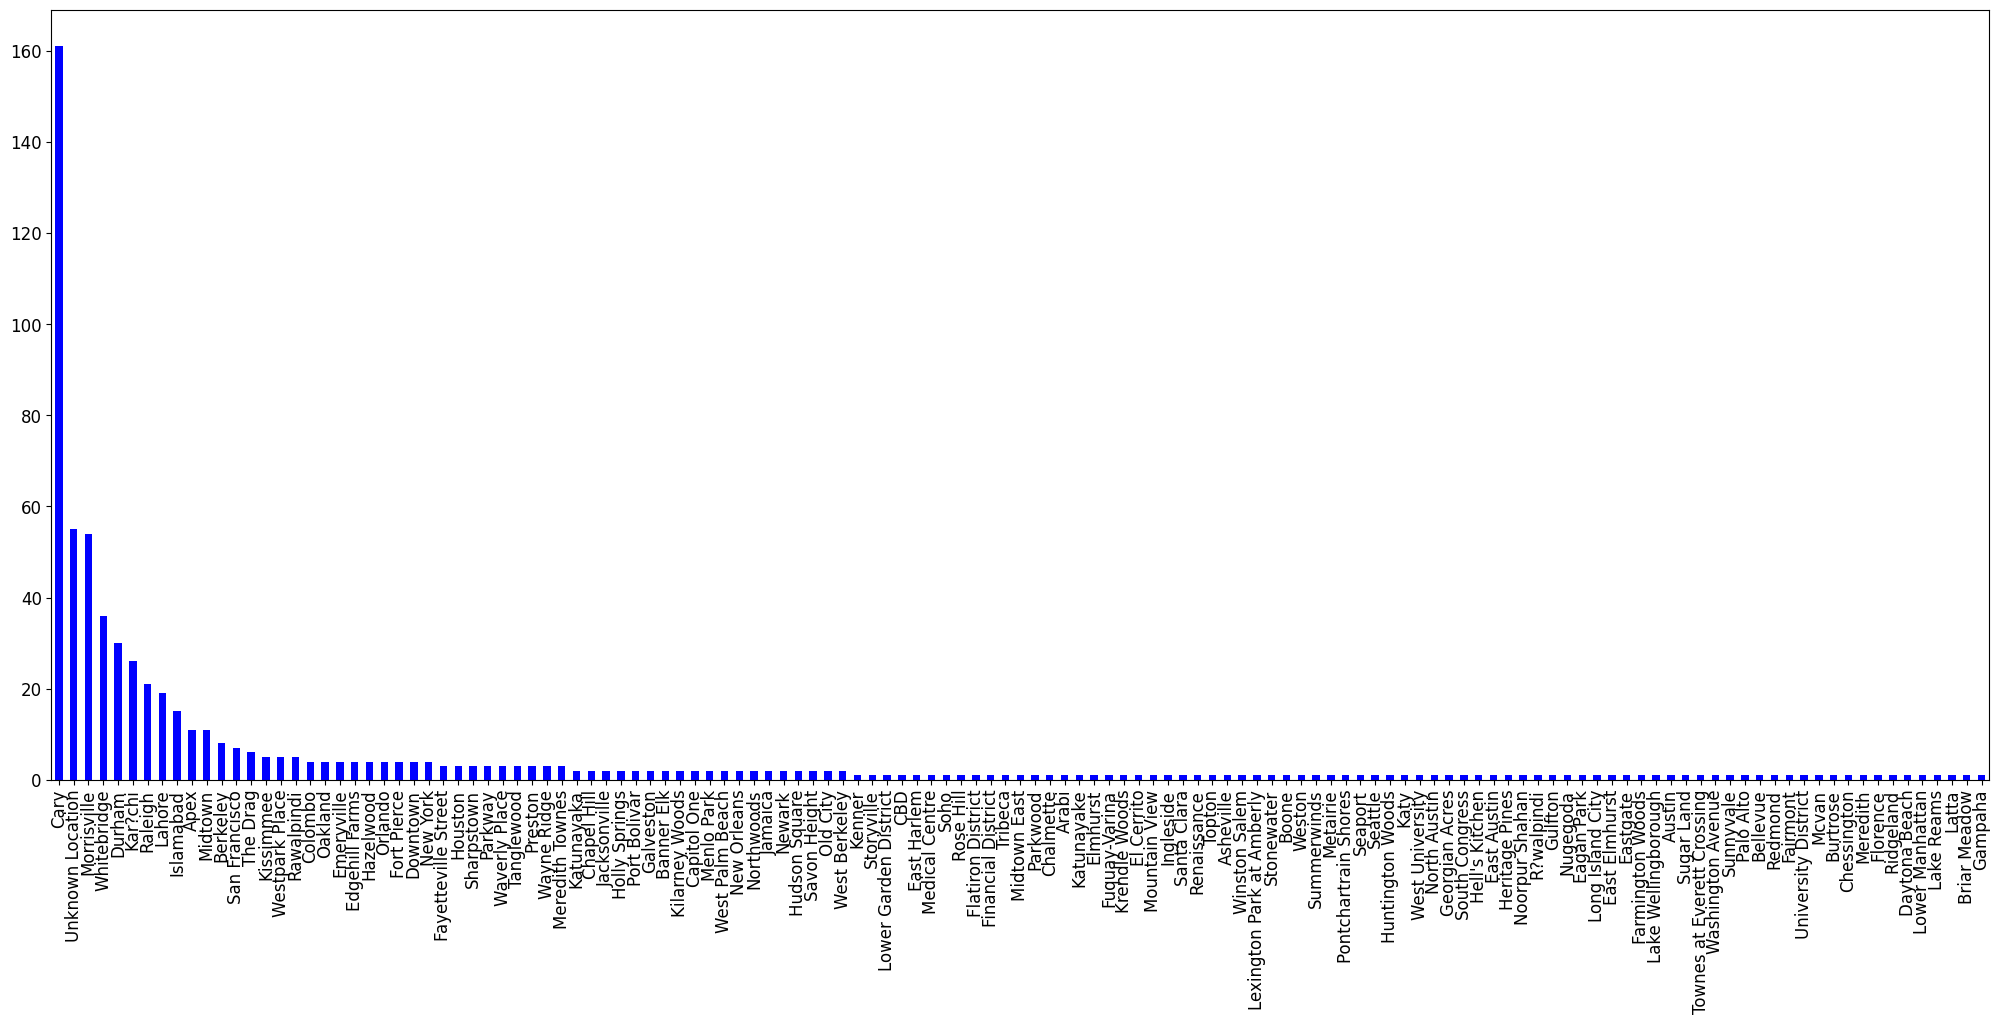

In [ ]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

Most people in this dataset starts their journey from Cary followed by some unknown location and then Morrisville.